#Logical Regression algorithm for MNIST Handwritten Digit Classification  (classify whether a digit is 7 or not 7)

Load MNIST data using sklearn and create a plot of the first 6  images


In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]

print(f"X has type {type(X)} and shape {X.shape}.")
print(f"y has type {type(y)} and shape {y.shape}.")

X has type <class 'pandas.core.frame.DataFrame'> and shape (70000, 784).
y has type <class 'pandas.core.series.Series'> and shape (70000,).


In [5]:
import numpy as np

# convert the type of X and y to numpy arrays
X = np.array(X)    
y = np.array(y)   

print(X.dtype, type(y[0]))
y = y.astype('uint8')
print(y.dtype)

float64 <class 'str'>
uint8


Display some mnist images. Each image is a row of size 784. Reshape this into 28 x 28 and display.

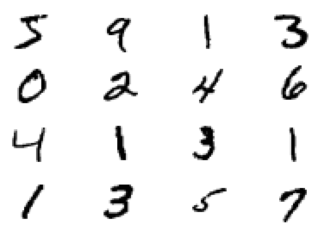

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(4, 4)

for i in range(4):
  for j in range(4):
    ax[i][j].imshow(X[i+j*4].reshape(28, 28), cmap="binary")
    ax[i][j].axis("off")

Repair y so that for digit 7, it is 1 and for others it is 0.

In [12]:
y =[1 if i==7 else 0 for i in y] 
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [13]:
from sklearn.preprocessing import normalize

X = normalize(X,norm= 'max')

Apply Logictic Regression algorithm

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression() 

In [20]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

accuracies = cross_val_score(log_reg,X,y,cv = 5,scoring ='accuracy') 

print(accuracies)

[0.98528571 0.98557143 0.98292857 0.98335714 0.98478571]


In [21]:
accuracy = accuracies.mean() 

print(f"{accuracy:.3f}")

0.984


In [23]:
is7 = np.count_nonzero(y)
print("Number of Seven's : ",is7)
not7 = len(y) - is7
print("Number of Non-Seven's: ",not7)

Number of Seven's :  7293
Number of Non-Seven's:  62707


In [24]:
from sklearn.model_selection import cross_val_predict

predictions =  cross_val_predict(log_reg, X, y, cv=5 ) 

Text(0.5, 257.44, 'Predicted label')

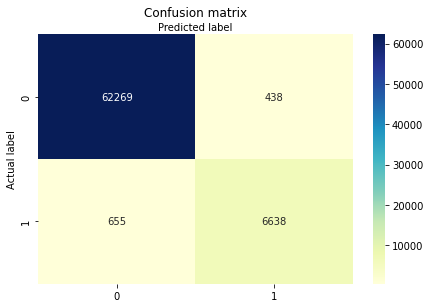

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

C = confusion_matrix( y,predictions) 

fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(C), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Normalize Confusion matrix

Text(0.5, 257.44, 'Predicted label')

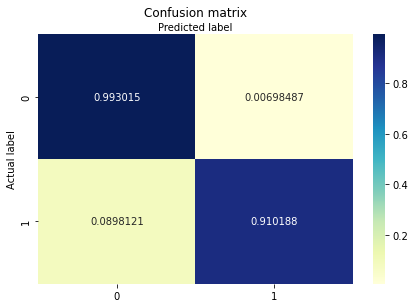

In [26]:
C_normalized = confusion_matrix(y, predictions, normalize= 'true') # fill your code here


fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(C_normalized), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

prec_score = precision_score( y, predictions)  
recall_score = recall_score( y, predictions)  
f_measure = f1_score( y, predictions) 

print('Precision: {:.3f}'.format(prec_score))
print('Recall: {:.3f}'.format(recall_score))
print('f1_score: {:.3f}'.format(f_measure))

Precision: 0.938
Recall: 0.910
f1_score: 0.924


In [28]:
probs = cross_val_predict( log_reg, X,y, method="predict_proba", cv=5) 
print(probs)

[[9.99270554e-01 7.29445808e-04]
 [9.99998637e-01 1.36314818e-06]
 [9.98754800e-01 1.24519961e-03]
 ...
 [9.94804148e-01 5.19585180e-03]
 [9.99993497e-01 6.50276327e-06]
 [1.00000000e+00 1.38623705e-10]]


In [29]:
positive_probs = probs[:,1] 
print(positive_probs)

[7.29445808e-04 1.36314818e-06 1.24519961e-03 ... 5.19585180e-03
 6.50276327e-06 1.38623705e-10]


In [30]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds =  precision_recall_curve( y, positive_probs)

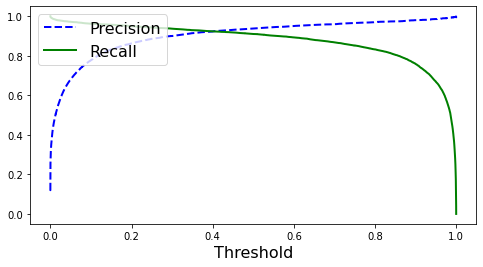

In [31]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [33]:
operating_point_index = np.where(np.isclose(np.around(thresholds, decimals=2), 0.6) == True)[0][0]
precisions[operating_point_index]

0.9498834498834499

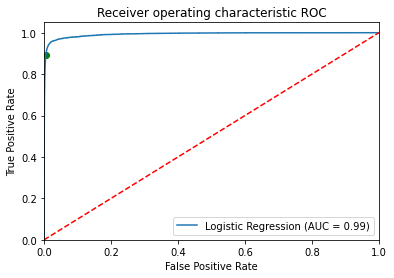

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# ROC curve
logit_roc_auc = roc_auc_score(y,positive_probs)
fpr, tpr, thresholds = roc_curve(y,positive_probs)

#visualize ROC curve
operating_point_index = np.where(np.isclose(np.around(thresholds, decimals=2), 0.6) == True)[0][0]
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.scatter(fpr[operating_point_index], tpr[operating_point_index], c="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")